In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
import math
import time
import networkx as nx

In [2]:
from NeuralNetwork import * 
from Observation import *
from AgentModule import *
from InitializationVariables import *
from Environment import *
from Evolution import *

imported Neural Network module
Imported initialized Variables
imported Observation
imported Agent module
Imported environ
imported evolution module


In [3]:
#Initialize environment and next_environment
environment, agents, environment_pop_density, environment_pheramones = initialize()
agents = initializeAgents(agent_count, agents)
barrierMask = getBarrierMask()
distToBarrier = getBarrierMaskDist(barrierMask)
survivalMask = getSurvivalMask()

In [4]:
#For an easier environment that reaches equilibrium much faster
barrierMask = getEmptyBarrierMask()
survivalMask[:,:] = 0
survivalMask[:, : 1 * environment_ySize//4  ]= 1

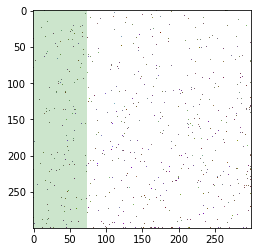

In [5]:
livingAgents, environment, killCount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask, environment_pop_density, environment_pheramones, killing)


In [6]:
countAlive = np.zeros(numGenerations)
countKilled = np.zeros(numGenerations)
timeStart = time.time()
for i in range(numGenerations):
    livingAgents, environment, killcount = simCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask,environment_pop_density, environment_pheramones, killing)
    countAlive[i] = len(livingAgents)/agent_count
    countKilled[i] = killcount/agent_count
    agents = repopulateAgents(livingAgents, monogamous)
    if i % plot_freq ==0 : print(f'finished cycle {i}')
    if i == 2 : time2 = time.time()
    if i == 3:
        tRun = time.time()-time2
        tTot = tRun * numGenerations
        print(f'Expected time: {tTot/60} Min')
timeEnd = time.time()

print(f'Time elapsed = {(timeEnd - timeStart )/ 60} minutes')
print(f'Time per run = {(timeEnd - timeStart)/numGenerations}')

finished cycle 0
finished cycle 1
finished cycle 2
finished cycle 3
Expected time: 0.724936842918396 Min
finished cycle 4
finished cycle 5
finished cycle 6
finished cycle 7
finished cycle 8
finished cycle 9
Time elapsed = 0.8630090316136678 minutes
Time per run = 5.1780541896820065


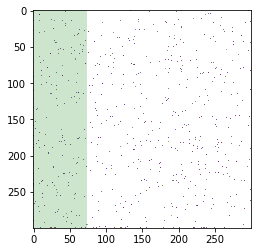

In [7]:
agents = repopulateAgents(livingAgents, monogamous)
livingAgents, environment, killcount = runCycle(steps_per_cycle, agents, environment, barrierMask, distToBarrier, survivalMask,environment_pop_density, environment_pheramones, killing)


In [8]:
test = countAlive

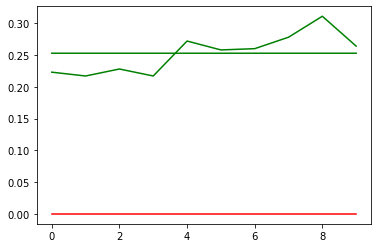

In [9]:
from scipy.ndimage import gaussian_filter

plt.plot(gaussian_filter(countAlive, sigma=20), 'g')
plt.plot(countAlive, 'g')
plt.plot(countKilled, 'r')

In [10]:
agents = repopulateAgents(livingAgents, monogamous)

In [11]:
a,b,c = getAgentAnalysis(agents)
printBucketAnalysis(a,b,c)

No Movement has 297.0
Move East has 959.0
Move North has 318.0
Move NorthEast has 1115.0
Move West has 115.0
Move South has 1054.0
Move SouthWest has 312.0
Move NorthWest has 2314.0
Move SouthEast has 323.0
forward has 1261.0
backwards has 208.0
turnCC has 1236.0
turnC has 313.0
kill has 1211.0
 - - - - - - - - 
getLoc_X has 232.0
getLoc_Y has 718.0
getBoundary_Dist_x has 111.0
getBoundary_Dist has 1424.0
getBoundary_Dist_y has 56.0
getYouth has 869.0
getLast_Move_X has 192.0
getLast_Move_Y has 1058.0
getPopulationForward has 125.0
getBarrierForward has 756.0
getPopulationDensity has 70.0
getPopulationGradient_xDirection has 754.0
getPopulationGradient_yDirection has 180.0
getOscilatorVal has 638.0
getAge has 74.0
getBarrierDistForward has 871.0
getFacingX has 197.0
getFacingY has 666.0
getRandom has 37.0
getPheramones has 787.0
getPheramonesForward has 318.0
getDistToBarrier has 903.0


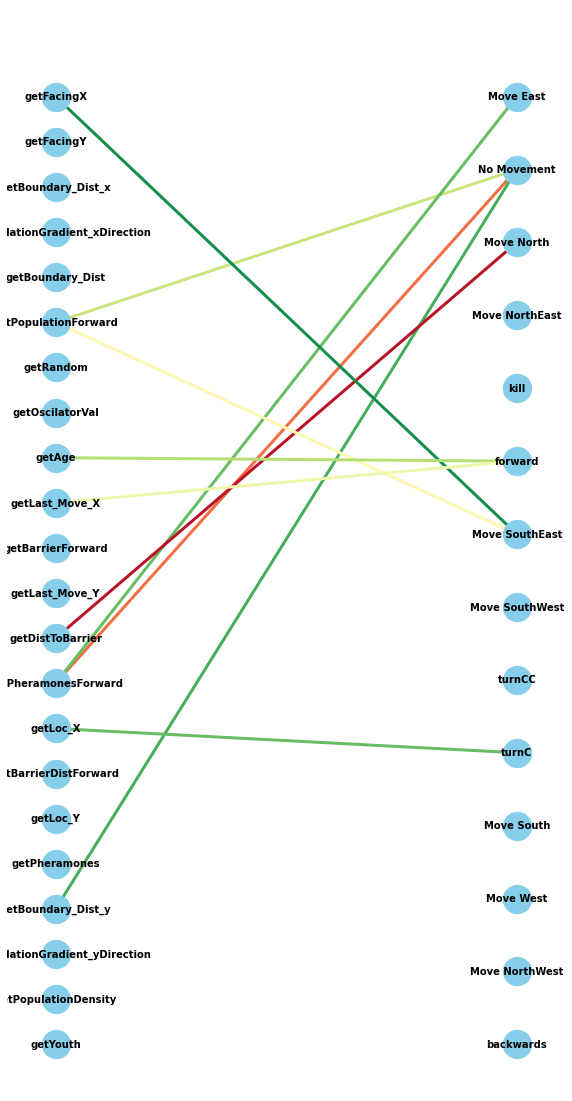

In [12]:
plotNeuralNetwork(livingAgents[0])